In [1]:
import numpy as np
import torch
import os
import sys
import pandas as pd
import argparse
import json
import matplotlib.pyplot as plt

torch.set_default_dtype(torch.float64)
torch.autograd.set_detect_anomaly(False)

cwd = os.getcwd()
script_dir = cwd
src_dir = "/".join(script_dir.split("/")[:-2]) # src directory is two levels up
sys.path.append(src_dir)

from src.problems import GB1onehot

/opt/conda/envs/PSBAX/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
input_dim = 80

DATA_DIR = os.path.join(script_dir, 'data')
df = pd.read_csv(os.path.join(DATA_DIR, 'GB1_fitness.csv'))
X = torch.load(os.path.join(DATA_DIR, 'GB1_onehot_x_bool.pt')).to(torch.float64)
y = torch.tensor(df['fit'].values).to(torch.float64)
test_data_size = 10000
# choose random data_size samples
test_indices = np.random.choice(149361, test_data_size, replace=False)

# plot histogram of y values



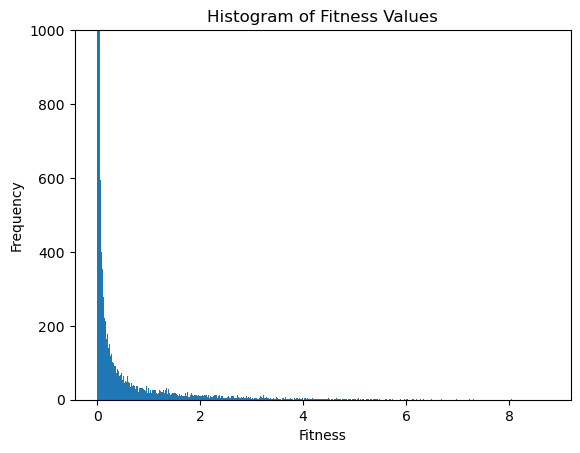

In [10]:
plt.hist(y, bins=1000)
plt.xlabel('Fitness')
plt.ylabel('Frequency')
plt.ylim(0, 1000)
plt.title('Histogram of Fitness Values')

plt.show()

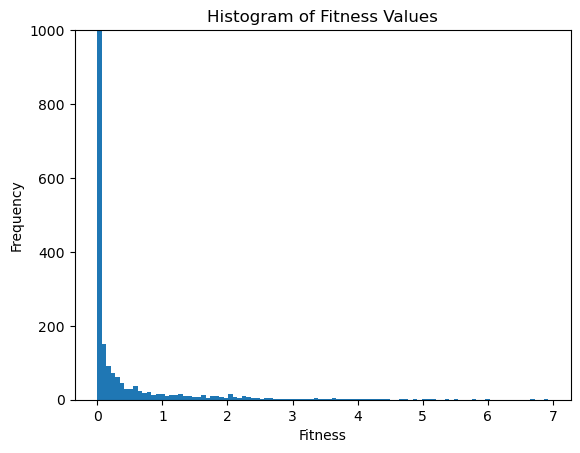

In [11]:
X = X[test_indices]
y = y[test_indices]

plt.hist(y, bins=100)
plt.xlabel('Fitness')
plt.ylabel('Frequency')
plt.ylim(0, 1000)
plt.title('Histogram of Fitness Values')
plt.show()

In [12]:
torch.save(torch.tensor(test_indices), os.path.join(DATA_DIR, 'gb1_test_indices.npy'))